# Lectures 6-7: Working with high-dimensional data
MCB288 Dan Rokhsar March 5-7 2018

In these lectures we will work with several datasets each item has many attributes. 
Often we want to 
- try to visualize structure in the data, and if possible reduce the dimensionality (i.e., find a small number of composite variables) to allow us humans to absorb the information ("dimensionality reduction")
- use measurements of multiple qualities per individual to try to predict specific features of that individual ("machine learning")

### Dataset 1:
Iris flower data set
https://en.wikipedia.org/wiki/Iris_flower_data_set

### Dataset 2: 
Breast Cancer Wisconsin (Original) Data Set
https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

### Dataset 3:
1000 (human) genomes (coming Wednesday)
https://github.com/gabraham/flashpca/blob/master/HapMap3/README.md


## Iris flower dataset 
From WikiPedia: The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper 
as an example of linear discriminant analysis.

Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus."

The data set consists of 50 samples from each of three species of Iris (*Iris setosa*, *Iris virginica* and *Iris versicolor*). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.
* R. A. Fisher (1936). "The use of multiple measurements in taxonomic problems". Annals of Eugenics. 7 (2): 179–188. doi:10.1111/j.1469-1809.1936.tb02137.x.
* Edgar Anderson (1936). "The species problem in Iris". Annals of the Missouri Botanical Garden. 23 (3): 457–509. JSTOR 2394164.
* Edgar Anderson (1935). "The irises of the Gaspé Peninsula". Bulletin of the American Iris Society. 59: 2–5.

## Wisconsin Breast Cancer dataset

Created by
Dr. WIlliam H. Wolberg (physician) 
University of Wisconsin Hospitals 
Madison, Wisconsin, USA 

Donated by
Olvi Mangasarian (mangasarian@cs.wisc.edu)
Received by David W. Aha (aha@cs.jhu.edu)

Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed from the data itself: 
- Group 1: 367 instances (January 1989) 
- Group 2: 70 instances (October 1989) 
- Group 3: 31 instances (February 1990) 
- Group 4: 17 instances (April 1990) 
- Group 5: 48 instances (August 1990) 
- Group 6: 49 instances (Updated January 1991) 
- Group 7: 31 instances (June 1991) 
- Group 8: 86 instances (November 1991) 
Total: 699 points (as of the donated datbase on 15 July 1992) 

Attribute Information:
1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)



## 1000 genomes data

This data was derived from the HapMap3 phase III data by Gad Abraham and Michael Inouye in
"Fast Principal Component Analysis of Large-Scale Genome-Wide Data"
http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0093766#s4

From Materials and Methods
"The HapMap phase 3 dataset consists of 1184 human individuals across 11 populations (ASW: African ancestry in Southwest USA; CEU: Utah residents with Northern and Western European ancestry from the CEPH collection; CHB: Han Chinese in Beijing, China; CHD: Chinese in Metropolitan Denver, Colorado; GIH: Gujarati Indians in Houston, Texas; JPT: Japanese in Tokyo, Japan; LWK: Luhya in Webuye, Kenya; MEX: Mexican ancestry in Los Angeles, California; MKK: Maasai in Kinyawa, Kenya; TSI: Toscani in Italia; YRI: Yoruba in Ibadan, Nigeria) assayed for 1,440,616 SNPs [6]. 

We performed QC on the data, including removal of SNPs with MAF, missingness, and deviation from Hardy-Weinberg equilibrium. We removed non-founders and individuals with genotyping missingness, leaving 957 individuals. Next, we removed several regions of high LD and/or known inversions (chr5∶44 Mb–51.5 Mb, chr6∶25 Mb–33.5 Mb, chr8∶8 Mb–12 Mb, chr11∶45 Mb–57 Mb) [15]. Finally, we used PLINK [16] –indep-pairwise 1000 10 0.02 to thin the SNPs by LD (), leaving 14,389 SNPs."

# OK lets get started.  
some material drawn from "Python Data Science Handbook" VanderPlas (O'Reilly).  Also, thanks to Alex Brandt and Jessen Bredeson for helping wrangle breast cancer and genomics data, respectively.

In [9]:
import pandas

import matplotlib.pyplot as plt
import seaborn as sns      # seaborn is a nice package for visualization
                           # that works well with pandas, has many features

from sklearn import datasets 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Iris data set

In [13]:
# the seaborn visualization package (and Scikit-learn) has some
# built-in dataset to play with, including the "famous" Fisher iris
# dataset (conveniently already in the form of a pandas Data Frame)
import seaborn as sns; sns.set()
iris = sns.load_dataset('iris')

In [14]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
#iris is a pandas data frame
iris.shape

(150, 5)

In [16]:
#the "index" is the number of rows
iris.index

RangeIndex(start=0, stop=150, step=1)

In [17]:
#the "columns" are the NAMES of the columns (instead of numbers as in numpy arrays)
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

(150, 4)

(150,)

In [66]:
iris['sepal_length'].mean()

5.8433333333333337

### we can use pandas functions to compute various quantities columnwise

In [69]:
# by default, operations on a data frame act on columns
iris.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [74]:
#get a boat-load of stats with "describe"
iris.describe()
#note: final colun is qualitative (i.e., species name) and pandas gracefully
#      avoids trying to summarize it
#note: you may want to try iris.dropna().describe() if there is missing data

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [75]:
# since we are told the species (presumably identified by the expert Anderson)
# it is natural to want to group the rows by their species.  
iris.groupby('species')
# this produces a new kind of object that has various methods for working with
# grouped data

In [76]:
iris.groupby('species').describe()

petal_length  petal_width  sepal_length  sepal_width
species                                                               
setosa     count     50.000000    50.000000     50.000000    50.000000
           mean       1.462000     0.246000      5.006000     3.428000
           std        0.173664     0.105386      0.352490     0.379064
           min        1.000000     0.100000      4.300000     2.300000
           25%        1.400000     0.200000      4.800000     3.200000
           50%        1.500000     0.200000      5.000000     3.400000
           75%        1.575000     0.300000      5.200000     3.675000
           max        1.900000     0.600000      5.800000     4.400000
versicolor count     50.000000    50.000000     50.000000    50.000000
           mean       4.260000     1.326000      5.936000     2.770000
           std        0.469911     0.197753      0.516171     0.313798
           min        3.000000     1.000000      4.900000     2.000000
           25%        4.000000     1.200000      5.600000     2.525000
           50%        4.350000     1.300000      5.900000     2.800000
           75%        4.600000     1.500000      6.300000     3.000000
           max        5.100000     1.800000      7.000000     3.400000
virginica  count     50.000000    50.000000     50.000000    50.000000
           mean       5.552000     2.026000      6.588000     2.974000
           std        0.551895     0.274650      0.635880     0.322497
           min        4.500000     1.400000      4.900000     2.200000
           25%        5.100000     1.800000      6.225000     2.800000
           50%        5.550000     2.000000      6.500000     3.000000
           75%        5.875000     2.300000      6.900000     3.175000
           max        6.900000     2.500000      7.900000     3.800000

In [77]:
# or we can make a kind of pivotted summary table
iris.groupby('species').describe().unstack()

petal_length                                               \
                  count   mean       std  min  25%   50%    75%  max   
species                                                                
setosa             50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9   
versicolor         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
virginica          50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

           petal_width        ...  sepal_length      sepal_width         \
                 count   mean ...           75%  max       count   mean   
species                       ...                                         
setosa            50.0  0.246 ...           5.2  5.8        50.0  3.428   
versicolor        50.0  1.326 ...           6.3  7.0        50.0  2.770   
virginica         50.0  2.026 ...           6.9  7.9        50.0  2.974   

                                                   
                 std  min    25%  50%    75%  max  
species                                            
setosa      0.379064  2.3  3.200  3.4  3.675  4.4  
versicolor  0.313798  2.0  2.525  2.8  3.000  3.4  
virginica   0.322497  2.2  2.800  3.0  3.175  3.8  

[3 rows x 32 columns]

In [62]:
#NOT USED
# make a dictionary in case we want to use numbers to represent the species
# note that this is just for convenience: there's no sense in which setosa
# and virginica are more distant than setosa-versicolor or versicolor-virginica
num_from_spec = {"setosa":1, "versicolor":2, "virginica":3}

### question no. 1: is any *single* variable enough of a diagnostic?

(array([ 1.88888889,  0.38888889,  0.38888889,  0.05555556,  0.05555556,
         0.        ,  0.        ,  0.38888889,  0.16666667,  0.27777778,
         1.16666667,  0.66666667,  0.22222222,  0.11111111,  0.66666667,
         0.61111111,  0.33333333,  0.16666667,  0.44444444,  0.33333333]),
 array([ 0.1 ,  0.22,  0.34,  0.46,  0.58,  0.7 ,  0.82,  0.94,  1.06,
         1.18,  1.3 ,  1.42,  1.54,  1.66,  1.78,  1.9 ,  2.02,  2.14,
         2.26,  2.38,  2.5 ]),
 <a list of 20 Patch objects>)

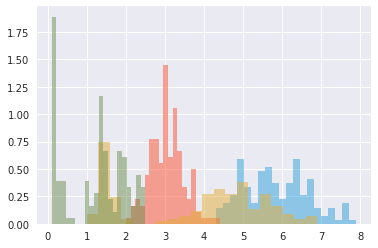

In [83]:
#when repeating plots, define a dictionary of all the other arguments of plt.hist
#kwargs = keyword-arguments.  This would apply to all histograms, saving typing
#makes it easier to change this global formatting.
kwargs = dict(normed=True, alpha = 0.5, bins=20)
plt.hist(iris["sepal_length"],**kwargs)
plt.hist(iris["sepal_width"],**kwargs)
plt.hist(iris["petal_length"],**kwargs)
plt.hist(iris["petal_width"],**kwargs)

### but this is not what we want -- it is just the distribution of each variable, not stratified by  species

(array([ 0.14814815,  0.18518519,  0.25925926,  0.59259259,  0.33333333,
         0.18518519,  0.48148148,  0.51851852,  0.37037037,  0.22222222,
         0.37037037,  0.59259259,  0.25925926,  0.40740741,  0.14814815,
         0.07407407,  0.14814815,  0.03703704,  0.18518519,  0.03703704]),
 array([ 4.3 ,  4.48,  4.66,  4.84,  5.02,  5.2 ,  5.38,  5.56,  5.74,
         5.92,  6.1 ,  6.28,  6.46,  6.64,  6.82,  7.  ,  7.18,  7.36,
         7.54,  7.72,  7.9 ]),
 <a list of 20 Patch objects>)

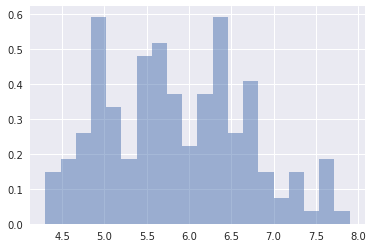

In [78]:
#make a histogram
plt.hist(iris["sepal_length"],normed=True, alpha = 0.5, bins=20)

In [ ]:
# but this doesn't differentiate among species

(array([  3.,   2.,   1.,  10.,   5.,   5.,   8.,   2.,   5.,   3.,   4.,
          2.]),
 array([ 4.9  ,  5.075,  5.25 ,  5.425,  5.6  ,  5.775,  5.95 ,  6.125,
         6.3  ,  6.475,  6.65 ,  6.825,  7.   ]),
 <a list of 12 Patch objects>)

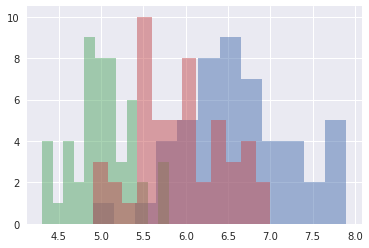

In [80]:
plt.hist(iris.sepal_length[iris.species=='virginica'], alpha = 0.5, bins = 12)
plt.hist(iris.sepal_length[iris.species=='setosa'], alpha = 0.5, bins=12)
plt.hist(iris.sepal_length[iris.species=='versicolor'], alpha = 0.5, bins=12)

### we really want to look at two-dimensional scatterplots

In [ ]:
plt.scatter(iris["sepal_length"],iris["sepal_width"],c=iris["petal_width"],alpha = 0.5, marker='o')
plt.colorbar() #show color scale
#label axes in matplotlib
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")

## Seaborn¶
"Seaborn aims to make visualization a central part of exploring and understanding data. The plotting functions operate on dataframes and arrays containing a whole dataset and internally perform the necessary aggregation and statistical model-fitting to produce informative plots. If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too." https://seaborn.pydata.org/introduction.html

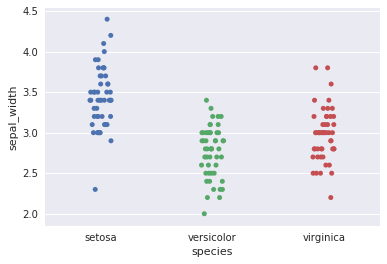

In [65]:
sns.stripplot(x="species", y="sepal_width", data=iris, jitter=True);

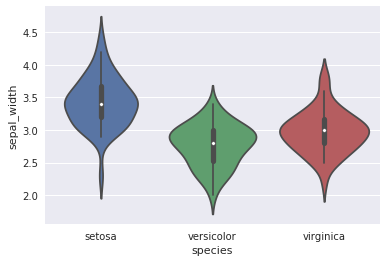

In [66]:
sns.violinplot(x="species", y="sepal_width", data=iris, jitter=True);

### question no. 2: what about pairs of variables?

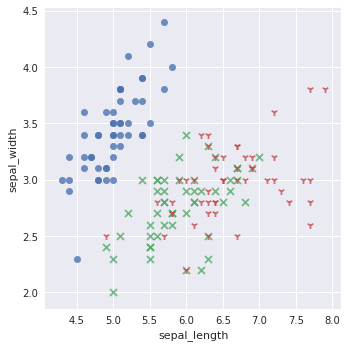

In [67]:
sns.lmplot( x="sepal_length", y="sepal_width", data=iris, fit_reg=False, 
           hue='species', legend=False, markers=["o", "x", "1"])

## this is tedious

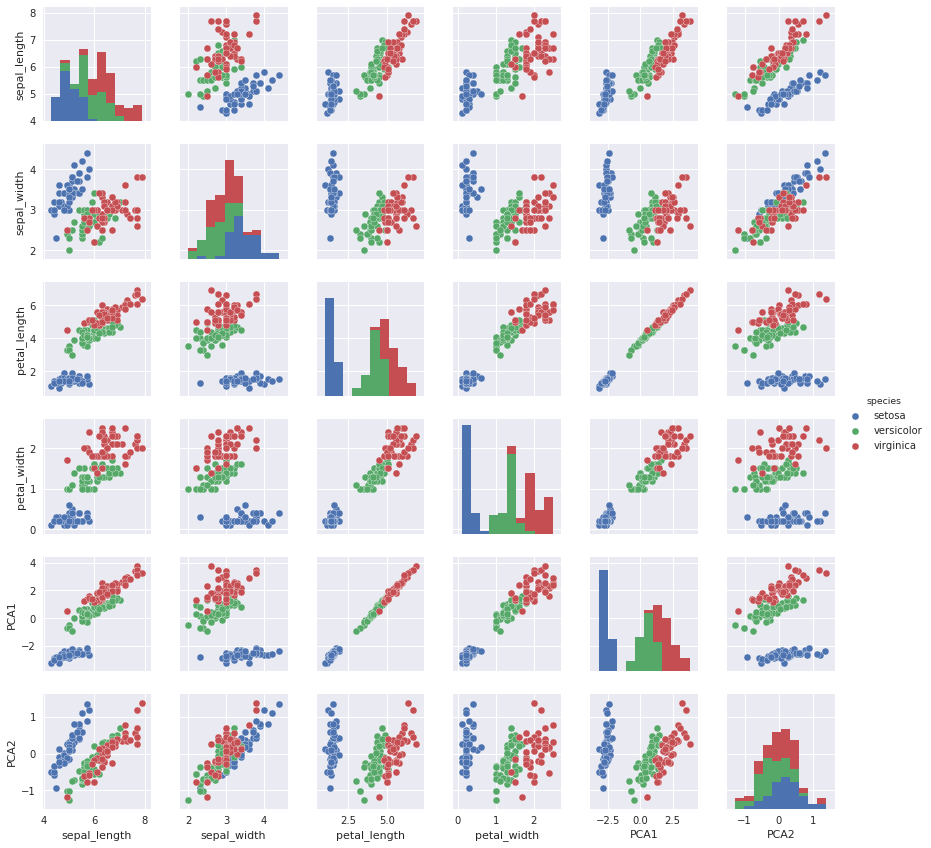

In [68]:
sns.pairplot(iris,hue='species',size=2)

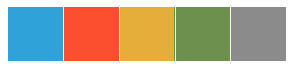

In [81]:
#we can choose another color palette by hand
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]

sns.set_palette(five_thirty_eight)
sns.palplot(sns.color_palette())
plt.show()

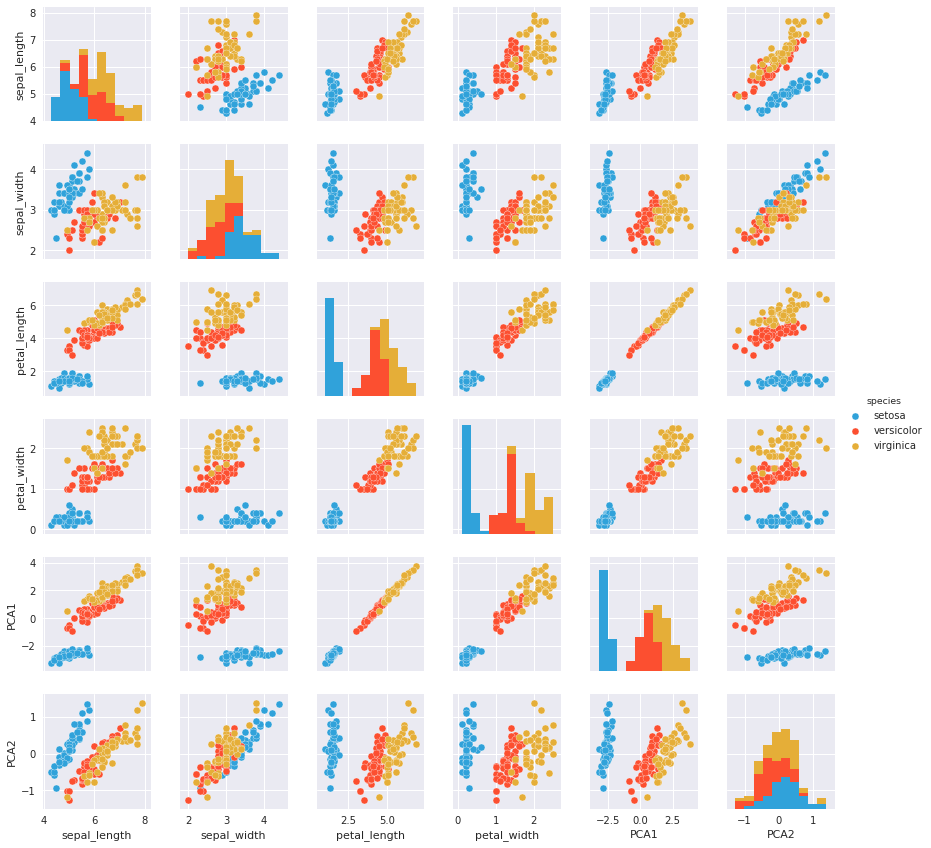

In [82]:
# now repeat the pairplot with this new palette
sns.pairplot(iris, hue='species',size=2)

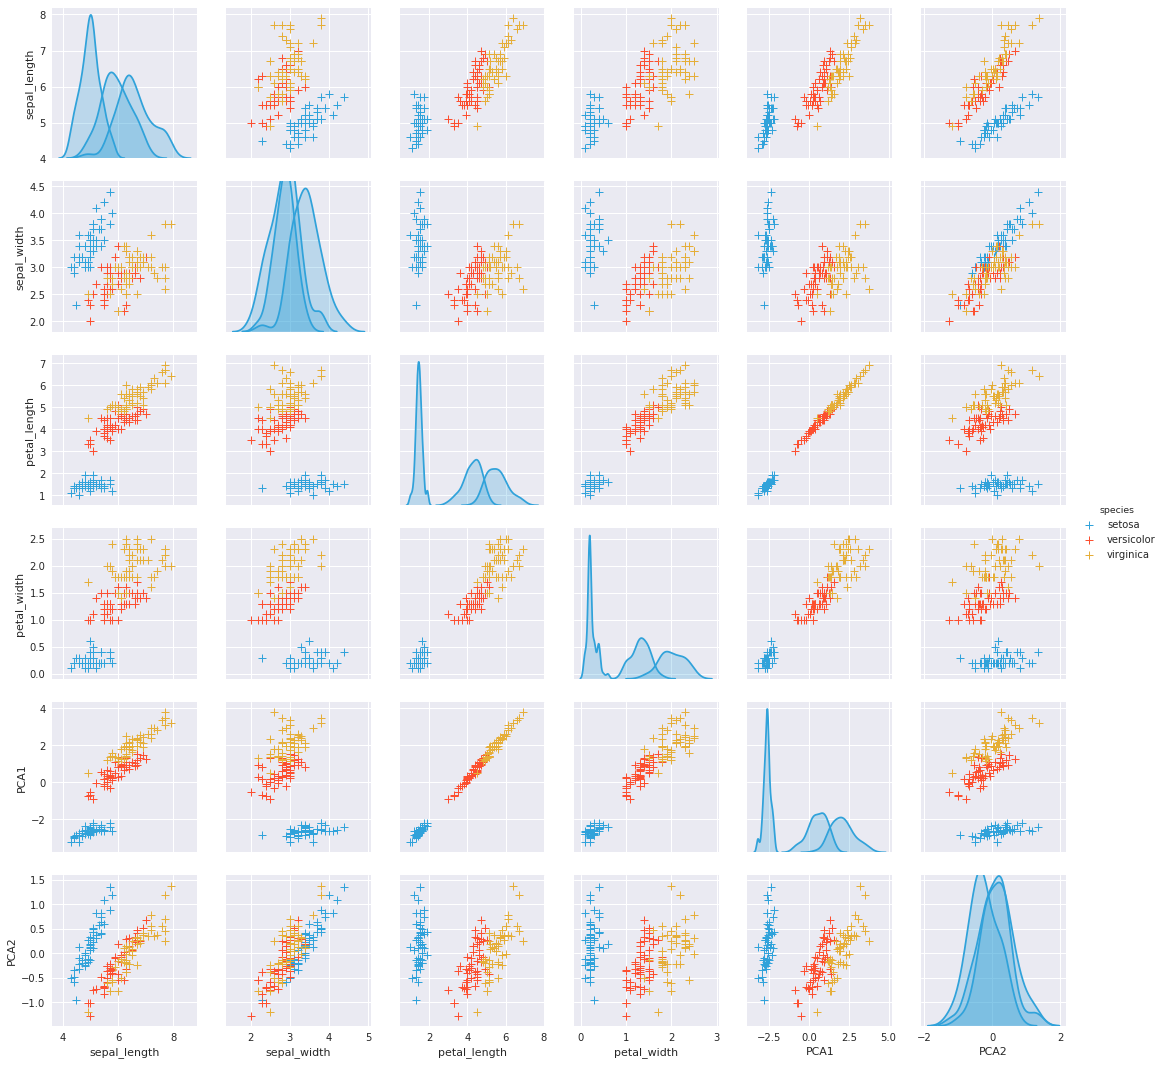

In [85]:
# we can make these progressively more beautiful by adding more bells and whistles
g = sns.pairplot(iris, diag_kind="kde", markers="+", hue='species',
    plot_kws=dict(s=50, edgecolor="b", linewidth=1),
    diag_kws=dict(shade=True))

## questions:
Can we use these four measurements **together** to differentiate the three species of iris?  
Could we use them to discover how many species there are (if we didn''t already know)?

## Principal component analysis

We have a high-dimensional space (here, four dimensions of petal/sepal measurements).

We want to find new variables that are weighted sums and differences of these four that 

In [46]:
# in preparation for "machine learning" 
# it'll be convenient to produce a "feature matrix" of
# (rows, columns) = (n_samples x n_features)
X_iris = iris.drop('species',axis=1)
X_iris.shape

(150, 6)

In [ ]:
# and a column vector of the "target" that is n_samples long
y_iris = iris['species']
y_iris.shape

In [31]:
from sklearn.decomposition import PCA #1 choose model class
model = PCA(n_components = 2)         #2 instantiate model with hyperparameters
model.fit(X_iris)                     #3 Fit to data.  note that y is not specified
X_2D = model.transform(X_iris)        #4 transform data to two dimensions

In [34]:
X_2D.shape

(150, 2)

In [53]:
# print first ten lines (note this is not a data frame :( )
X_2D[0:10,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425]])

In [54]:
# append these to the iris dataframe
iris["PCA1"] = X_2D[:, 0]
iris["PCA2"] = X_2D[:, 1]

In [38]:
iris.shape

(150, 7)

In [39]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


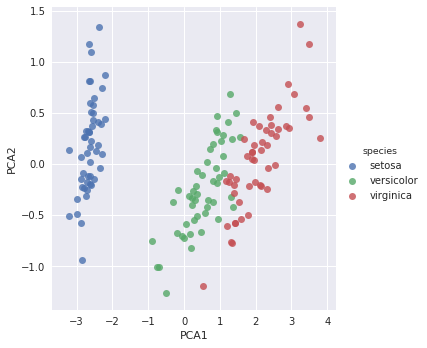

In [41]:
sns.lmplot("PCA1", "PCA2", hue = "species", data=iris, fit_reg=False)

In [58]:
iris.index

RangeIndex(start=0, stop=150, step=1)

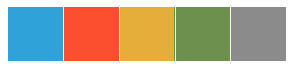

### what does this tell us?
- the blue type (*setosa*) is easy to separate from the green and red (*versicolor* and *virginica*)
- single variables are insufficient to differentiate the species, since distributions overlap (at least pairwise)
- pairs of variables are often correlated (bigger sepals means bigger petals and vice versa)


## The sci-kit-learn version of the iris dataset is a numpy array

In [43]:
# Note: scikit-learn also has the "iris" dataset, 
# but as a simple array, rather than as a data frame
from sklearn import datasets
from sklearn.datasets import load_iris
iris2 = load_iris()

In [44]:
features = iris2.data.T
iris2.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# Choose model
# first import the model "class" (general type of model)
from sklearn.decomposition import PCA
# then instantiate a model (a particular example of the general "class") 
# by specifying parameters
pca = PCA(n_components = 2)

# Breast cancer dataset

In [119]:
cancer = pandas.read_csv("breast-cancer-wisconsin-cleaned.data",
                       names = ["ID", "Clump_Thickness", "Uniformity_Size",
          "Uniformity_Shape", "Adhesion", "Epithelial_Cell_Size",
          "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses",
          "Class"])

# Note "Class" is the eventual diagnosis

In [96]:
cancer.head()

,ID,Clump_Thickness,Uniformity_Size,Uniformity_Shape,Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [113]:
cancer.describe()

,ID,Clump_Thickness,Uniformity_Size,Uniformity_Shape,Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [118]:
cancer['Class']

0      2
1      2
2      2
3      2
4      2
5      4
6      2
7      2
8      2
9      2
10     2
11     2
12     4
13     2
14     4
15     4
16     2
17     2
18     4
19     2
20     4
21     4
22     2
23     4
24     2
25     4
26     2
27     2
28     2
29     2
      ..
669    4
670    4
671    2
672    2
673    2
674    2
675    2
676    2
677    2
678    2
679    2
680    4
681    4
682    2
683    2
684    2
685    2
686    2
687    2
688    2
689    2
690    2
691    4
692    2
693    2
694    2
695    2
696    4
697    4
698    4
Name: Class, dtype: int64

In [115]:
cancer.groupby('Class').describe()

Adhesion  Bare_Nuclei  Bland_Chromatin  Clump_Thickness  \
Class                                                                    
2     count  458.000000   458.000000       458.000000       458.000000   
      mean     1.364629     1.336245         2.100437         2.956332   
      std      0.996830     1.161206         1.080339         1.674318   
      min      1.000000     1.000000         1.000000         1.000000   
      25%      1.000000     1.000000         1.000000         1.000000   
      50%      1.000000     1.000000         2.000000         3.000000   
      75%      1.000000     1.000000         3.000000         4.000000   
      max     10.000000    10.000000         7.000000         8.000000   
4     count  241.000000   241.000000       241.000000       241.000000   
      mean     5.547718     7.572614         5.979253         7.195021   
      std      3.210465     3.161605         2.273852         2.428849   
      min      1.000000     1.000000         1.000000         1.000000   
      25%      3.000000     5.000000         4.000000         5.000000   
      50%      5.000000    10.000000         7.000000         8.000000   
      75%      8.000000    10.000000         7.000000        10.000000   
      max     10.000000    10.000000        10.000000        10.000000   

             Epithelial_Cell_Size            ID     Mitoses  Normal_Nucleoli  \
Class                                                                          
2     count            458.000000  4.580000e+02  458.000000       458.000000   
      mean               2.120087  1.107591e+06    1.063319         1.290393   
      std                0.917130  7.234318e+05    0.501995         1.058856   
      min                1.000000  6.163400e+04    1.000000         1.000000   
      25%                2.000000  1.002614e+06    1.000000         1.000000   
      50%                2.000000  1.180170e+06    1.000000         1.000000   
      75%                2.000000  1.256870e+06    1.000000         1.000000   
      max               10.000000  1.345435e+07    8.000000         9.000000   
4     count            241.000000  2.410000e+02  241.000000       241.000000   
      mean               5.298755  1.003505e+06    2.589212         5.863071   
      std                2.451606  3.222323e+05    2.557939         3.350672   
      min                1.000000  6.337500e+04    1.000000         1.000000   
      25%                3.000000  8.322260e+05    1.000000         3.000000   
      50%                5.000000  1.126417e+06    1.000000         6.000000   
      75%                6.000000  1.221863e+06    3.000000        10.000000   
      max               10.000000  1.371026e+06   10.000000        10.000000   

             Uniformity_Shape  Uniformity_Size  
Class                                           
2     count        458.000000       458.000000  
      mean           1.443231         1.325328  
      std            0.997836         0.907694  
      min            1.000000         1.000000  
      25%            1.000000         1.000000  
      50%            1.000000         1.000000  
      75%            1.000000         1.000000  
      max            8.000000         9.000000  
4     count        241.000000       241.000000  
      mean           6.560166         6.572614  
      std            2.562045         2.719512  
      min            1.000000         1.000000  
      25%            4.000000         4.000000  
      50%            6.000000         6.000000  
      75%            9.000000        10.000000  
      max           10.000000        10.000000

In [116]:
cancer.groupby('Class').mean()

,ID,Clump_Thickness,Uniformity_Size,Uniformity_Shape,Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
Class,,,,,,,,,,
2,1.107591e+06,2.956332,1.325328,1.443231,1.364629,2.120087,1.336245,2.100437,1.290393,1.063319
4,1.003505e+06,7.195021,6.572614,6.560166,5.547718,5.298755,7.572614,5.979253,5.863071,2.589212


/srv/app/venv/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/srv/app/venv/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


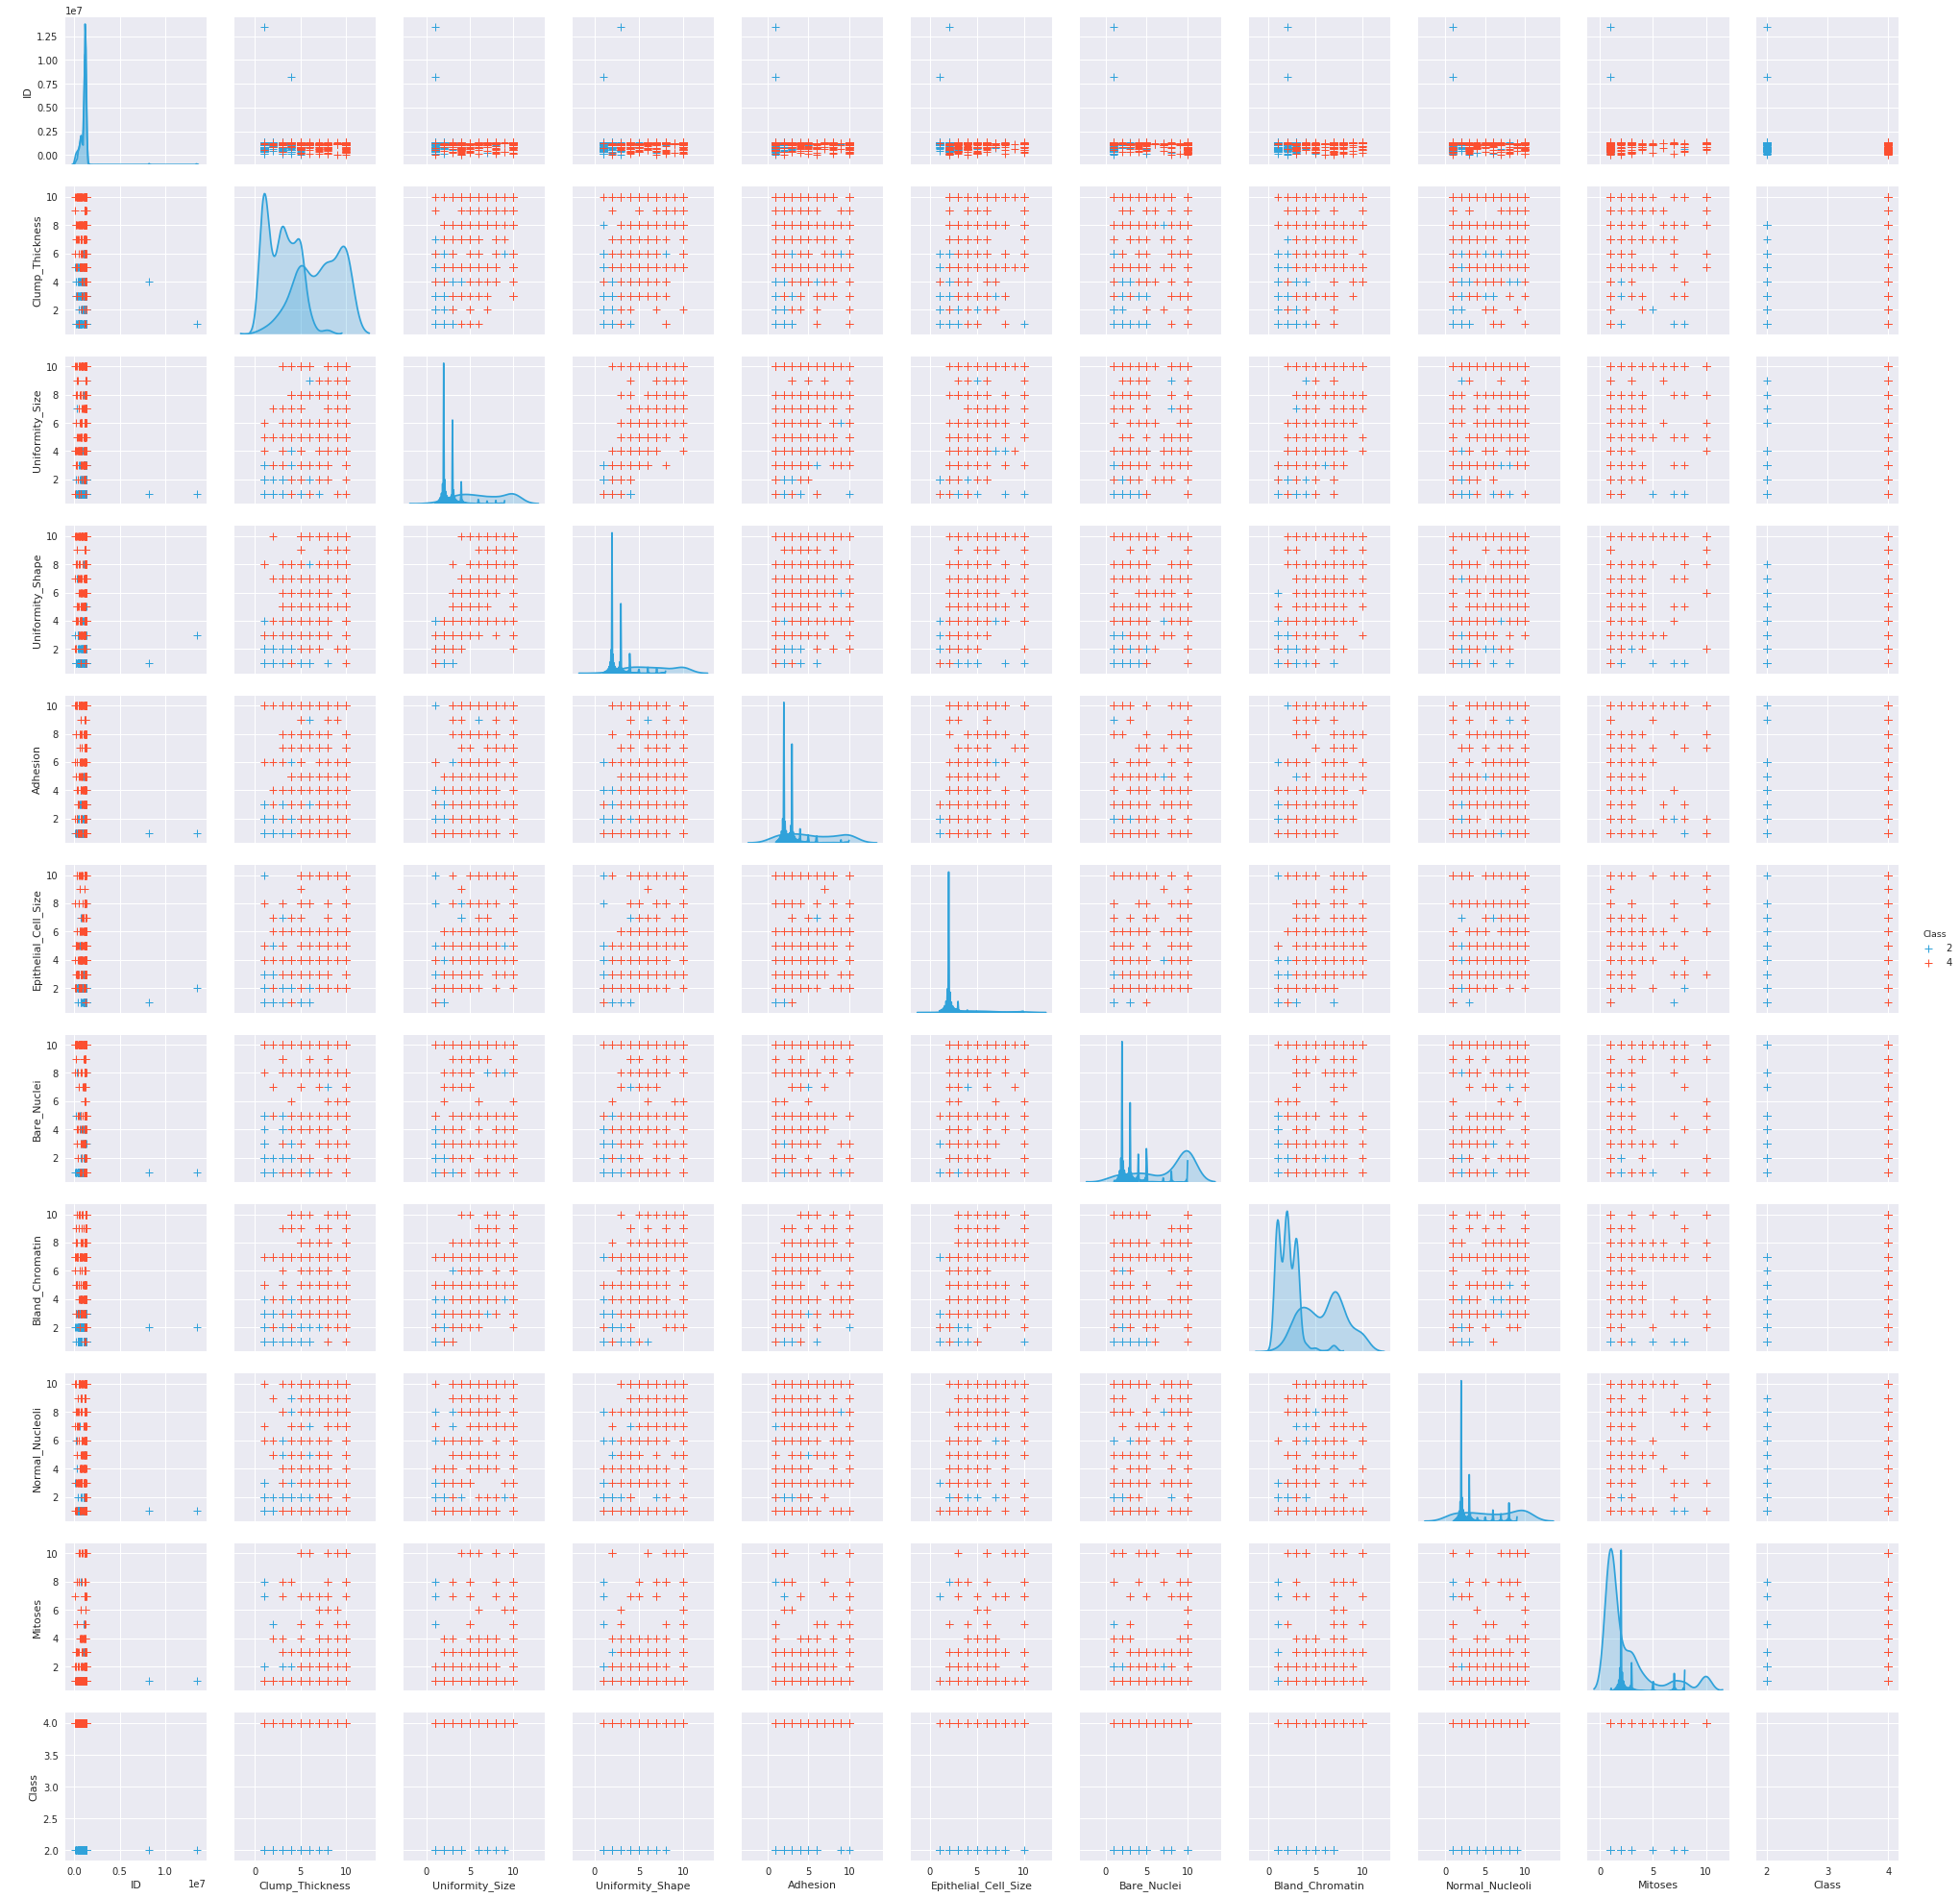

In [112]:
g = sns.pairplot(cancer, diag_kind="kde", markers="+", hue='Class',
    plot_kws=dict(s=50, edgecolor="b", linewidth=1),
    diag_kws=dict(shade=True))

In [ ]:
sns.pairplot(cancer, hue='Class', size=2, plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

In [21]:
X = data[["Clump_Thickness", "Uniformity_Size", "Uniformity_Shape", "Adhesion", 
      "Epithelial_Cell_Size", "Bare_Nuclei", "Bland_Chromatin", 
      "Normal_Nucleoli", "Mitoses"]]
y = data["Class"]

explained variance ratio (first two components): [ 0.68900383  0.07337931]


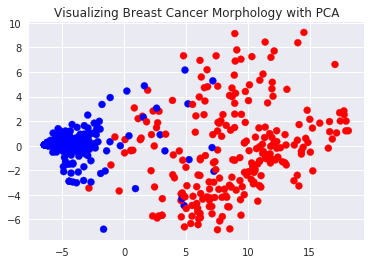

In [22]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'darkorange', 'red', 'green']
lw = 2

target_names = [2,4]

my_class = list(data["Class"])

plt.scatter(X_r[0:,0], X_r[0:,1], 
            color=['blue' if x==2 else 'red' for x in  list(data["Class"])])
plt.title("Visualizing Breast Cancer Morphology with PCA")
# plt.legend(loc='best', shadow=False)
#plt.figure()
#for color, i, target_name in zip(colors, [0, 1, 2], target_names):
#    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, # color=color,
#                label=target_name)
#plt.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('LDA of IRIS dataset')
#
#plt.show()


## Genomic dataset

In [125]:
chr1SNPs = pandas.read_csv("FASTPCA_cleaned_chr1_bim.csv", names=["Chrom", "SNP_ID", "Genetic","Physical","Major","Minor"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55b4bc1550>]], dtype=object)

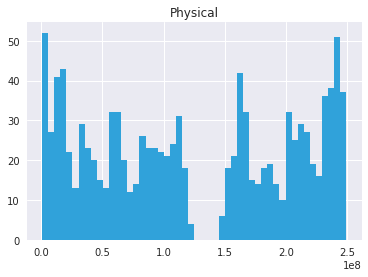

In [130]:
chr1SNPs.hist('Physical',bins=50)

In [133]:
pops_relations = pandas.read_csv("FASTPCA_pops_relations.csv")

In [135]:
pops_relations.groupby('population').countquestions:
Can we use these four measurements to differentiate the three species of iris?
Could we use them to discover how many species there are (if we didn''t already know)?

Principal component analysis
We have a high-dimensional space (here, four dimensions of petal/sepal measurements).

We want to find new variables that are weighted sums and differences of these four that


# in preparation for "machine learning" 
# it'll be convenient to produce a "feature matrix" of
# (rows, columns) = (n_samples x n_features)
X_iris = iris.drop('species',axis=1)
X_iris.shape
(150, 6)

# and a column vector of the "target" that is n_samples long
y_iris = iris['species']
y_iris.shape

from sklearn.decomposition import PCA #1 choose model class
model = PCA(n_components = 2)         #2 instantiate model with hyperparameters
model.fit(X_iris)                     #3 Fit to data.  note that y is not specified
X_2D = model.transform(X_iris)        #4 transform data to two dimensions

X_2D.shape
(150, 2)

# print first ten lines (note this is not a data frame :( )
X_2D[0:10,:]
array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425]])

# append these to the iris dataframe
iris["PCA1"] = X_2D[:, 0]
iris["PCA2"] = X_2D[:, 1]

iris.shape
(150, 7)

iris.head()
sepal_length	sepal_width	petal_length	petal_width	species	PCA1	PCA2
0	5.1	3.5	1.4	0.2	setosa	-2.684126	0.319397
1	4.9	3.0	1.4	0.2	setosa	-2.714142	-0.177001
2	4.7	3.2	1.3	0.2	setosa	-2.888991	-0.144949
3	4.6	3.1	1.5	0.2	setosa	-2.745343	-0.318299
4	5.0	3.6	1.4	0.2	setosa	-2.728717	0.326755

sns.lmplot("PCA1", "PCA2", hue = "species", data=iris, fit_reg=False)
<seaborn.axisgrid.FacetGrid at 0x7fd902402898>


sns.lmplot( x="sepal_length", y="sepal_width", data=iris, fit_reg=False, 
           hue='species', legend=False, markers=["o", "x", "1"])
<seaborn.axisgrid.FacetGrid at 0x7fd907dce9b0>
()

,FID,IID,dad,mom,sex,pheno
population,,,,,,
ASW,90,90,90,90,90,90
CEU,180,180,180,180,180,180
CHB,90,90,90,90,90,90
CHD,100,100,100,100,100,100
GIH,100,100,100,100,100,100
JPT,91,91,91,91,91,91
LWK,100,100,100,100,100,100
MEX,90,90,90,90,90,90
MKK,180,180,180,180,180,180
